Text(0.5, 1.0, '가나다')

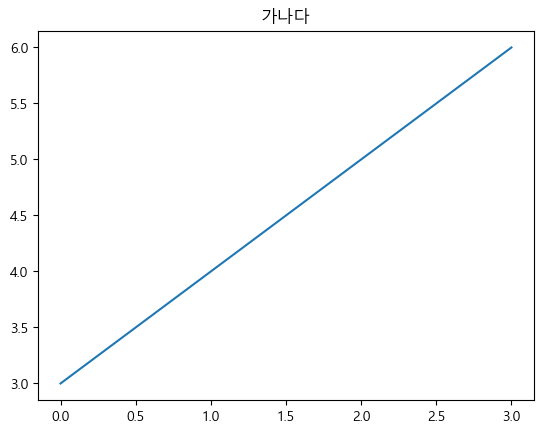

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.plot([3,4,5,6])
plt.title('가나다')

In [13]:
!pip install chardet


In [14]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

file_path = '날씨정보.csv'
encoding = detect_encoding(file_path)
print(f"파일의 인코딩: {encoding}")

파일의 인코딩: utf-8


In [15]:
#######################
###### csv파일 읽기
#######################

import csv

def MyOpen(filename):
    data = []
    f = open(fileName,'r',encoding='utf-8')
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
    f.close()
    return(data)

fileName = '날씨정보.csv'
dataList=MyOpen(fileName)
dataList[:3]

[['지점명', '관측시간', '최고기온', '최저기온', '강수량'],
 ['서울', '2023-01-01', '3.8', '-4.3', ''],
 ['서울', '2023-01-02', '-0.4', '-7.4', '']]

In [16]:
header=dataList[0];local=dataList[1:]
label=[]
for x in local:
    label.append(x[2]+'-'+x[3])
num=[]
for x in local:
   num.append(x[4:6])


In [17]:
import numpy as np
new_num=[]
for x in local:
    new_num.append(float(x[3]))
np.sum(new_num,axis=0)

np.mean(new_num,axis=0)
np.max(new_num,axis=0)

14.5

In [18]:
local[31]

['부산', '2023-01-02', '6.4', '-1.8', '']

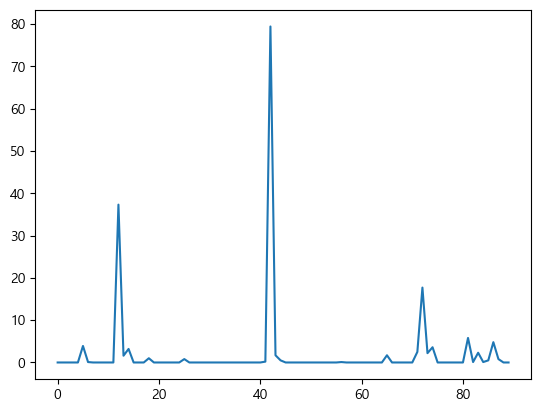

In [19]:
new_num=[]
for x in local:
    if x[4]=='':
        new_num.append(0)
    else:
        new_num.append(float(x[4]))

import matplotlib.pyplot as plt
plt.plot(new_num)

(0.0, 80.0)

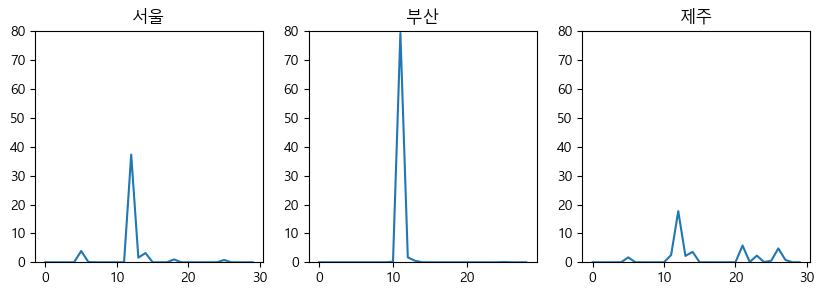

In [20]:
new_num=[]
for x in local:
    if x[4]=='':
        new_num.append(0)
    else:
        new_num.append(float(x[4]))

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic' # 한글깨짐현상때문에 사용
서울,부산,제주=new_num[:30],new_num[31:60],new_num[60:]

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(서울)
plt.title('서울')
plt.ylim([0,80])

plt.subplot(1,3,2)
plt.plot(부산)
plt.title('부산')
plt.ylim([0,80])

plt.subplot(1,3,3)
plt.plot(제주)
plt.title('제주')
plt.ylim([0,80])

In [21]:
## 작업1
import csv

data = []
f = open('날씨정보.csv','r',encoding='utf-8')
reader = csv.reader(f)
for row in reader:
    data.append(row)
f.close()

In [22]:
# 열 인덱스 찾기
지점명_인덱스 = None
강수량_인덱스 = None

if data:
    헤더 = data[0]
    for i, 열 in enumerate(헤더):
        if "지점명" in 열:
            지점명_인덱스 = i
        elif "강수량" in 열:
            강수량_인덱스 = i

# 각 도시의 총 강수량을 저장할 변수 초기화
서울_강수량 = 0
제주_강수량 = 0
부산_강수량 = 0

# 각 도시의 강수량 더하기
for row in data[1:]:  # 헤더를 건너뛰기 위해 두 번째 행부터 시작
    if 지점명_인덱스 is not None and 강수량_인덱스 is not None:
        지점명 = row[지점명_인덱스]
        강수량 = float(row[강수량_인덱스]) if row[강수량_인덱스] else 0

        # 지점명에 따라 강수량 더하기
        if "서울" in 지점명:
            서울_강수량 += 강수량
        elif "제주" in 지점명:
            제주_강수량 += 강수량
        elif "부산" in 지점명:
            부산_강수량 += 강수량

# 각 도시의 총 강수량 출력
print(f"서울의 총 강수량: {서울_강수량} mm")
print(f"제주의 총 강수량: {제주_강수량} mm")
print(f"부산의 총 강수량: {부산_강수량} mm")

서울의 총 강수량: 47.9 mm
제주의 총 강수량: 42.099999999999994 mm
부산의 총 강수량: 81.9 mm


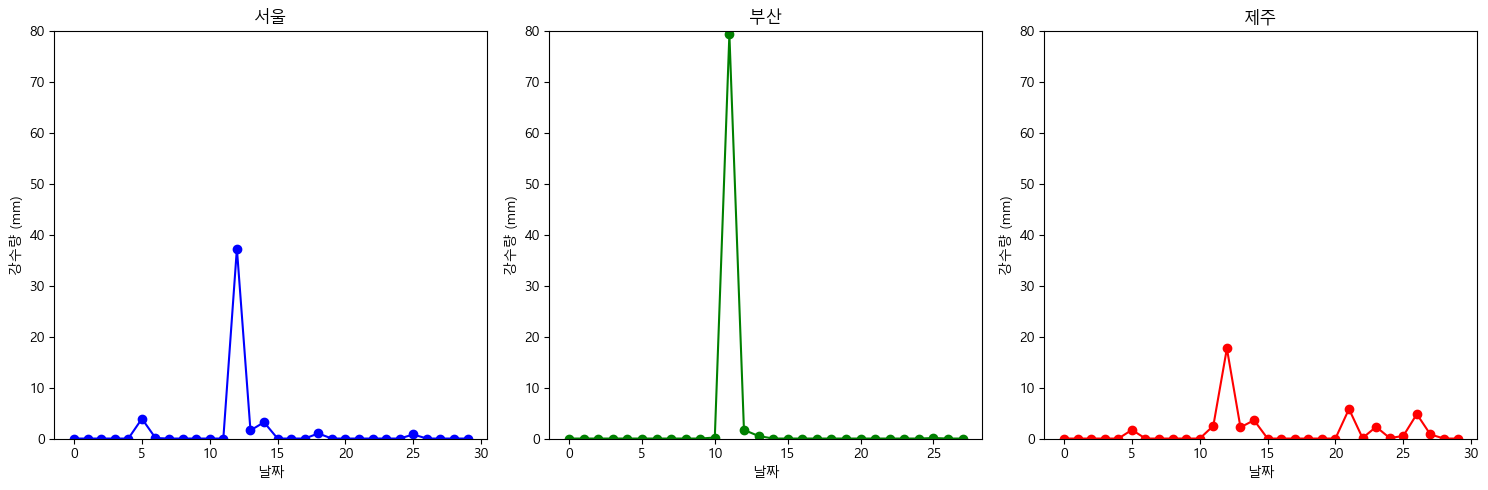

In [26]:
import matplotlib.pyplot as plt

header=dataList[0];local=dataList[1:]
label=[]
for x in local:
    label.append(x[2]+'-'+x[3])
num=[]
for x in local:
   num.append(x[4:6])

# 주어진 데이터에서 강수량을 추출하여 리스트에 저장
new_num = []
for x in local:
    if x[4] == '':
        new_num.append(0)
    else:
        new_num.append(float(x[4]))

# 서울, 부산, 제주 지역으로 데이터 분리
서울, 부산, 제주 = new_num[:30], new_num[31:59], new_num[60:]

# 서브플롯을 이용하여 세 개의 지역을 한 줄에 나타내기
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(서울, marker='o', linestyle='-', color='b')
plt.title('서울')
plt.xlabel('날짜')
plt.ylabel('강수량 (mm)')
plt.ylim([0, 80])

plt.subplot(1, 3, 2)
plt.plot(부산, marker='o', linestyle='-', color='g')
plt.title('부산')
plt.xlabel('날짜')
plt.ylabel('강수량 (mm)')
plt.ylim([0, 80])

plt.subplot(1, 3, 3)
plt.plot(제주, marker='o', linestyle='-', color='r')
plt.title('제주')
plt.xlabel('날짜')
plt.ylabel('강수량 (mm)')
plt.ylim([0, 80])

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()

In [28]:
# 주어진 데이터에서 최고기온과 최저기온을 추출하여 리스트에 저장
최고기온 = []
최저기온 = []

for x in local:
    if x[2] != '' and x[3] != '':
        최고기온.append(float(x[2]))
        최저기온.append(float(x[3]))
    else:
        최고기온.append(None)
        최저기온.append(None)

# 서울, 부산, 제주 지역으로 데이터 분리
서울_최고기온 = 최고기온[:30]
서울_최저기온 = 최저기온[:30]

부산_최고기온 = 최고기온[30:60]
부산_최저기온 = 최저기온[30:60]

제주_최고기온 = 최고기온[60:]
제주_최저기온 = 최저기온[60:]

# 기온 차이 계산
서울_기온차이 = [tmax - tmin if tmax is not None and tmin is not None else None for tmax, tmin in zip(서울_최고기온, 서울_최저기온)]
부산_기온차이 = [tmax - tmin if tmax is not None and tmin is not None else None for tmax, tmin in zip(부산_최고기온, 부산_최저기온)]
제주_기온차이 = [tmax - tmin if tmax is not None and tmin is not None else None for tmax, tmin in zip(제주_최고기온, 제주_최저기온)]

# 새로운 필드 추가
for i, x in enumerate(local):
    if i < 30:
        x.append(서울_기온차이[i])
    elif 30 <= i < 60:
        x.append(부산_기온차이[i-30])
    else:
        x.append(제주_기온차이[i-60] if i-60 < len(제주_기온차이) else None)

for x in local:
    print(x)


['서울', '2023-01-01', '3.8', '-4.3', '', 8.1, 8.1, 8.1]
['서울', '2023-01-02', '-0.4', '-7.4', '', 7.0, 7.0, 7.0]
['서울', '2023-01-03', '0.6', '-9.0', '', 9.6, 9.6, 9.6]
['서울', '2023-01-04', '3.3', '-5.7', '', 9.0, 9.0, 9.0]
['서울', '2023-01-05', '3.6', '-5.6', '', 9.2, 9.2, 9.2]
['서울', '2023-01-06', '5.7', '-4.7', '3.9', 10.4, 10.4, 10.4]
['서울', '2023-01-07', '3.8', '-1.4', '0.1', 5.199999999999999, 5.199999999999999, 5.199999999999999]
['서울', '2023-01-08', '6.3', '-3.7', '', 10.0, 10.0, 10.0]
['서울', '2023-01-09', '7.0', '-1.3', '', 8.3, 8.3, 8.3]
['서울', '2023-01-10', '9.1', '-3.9', '', 13.0, 13.0, 13.0]
['서울', '2023-01-11', '9.2', '-2.0', '', 11.2, 11.2, 11.2]
['서울', '2023-01-12', '12.5', '-0.6', '0.0', 13.1, 13.1, 13.1]
['서울', '2023-01-13', '10.1', '5.1', '37.3', 5.0, 5.0, 5.0]
['서울', '2023-01-14', '8.4', '3.8', '1.6', 4.6000000000000005, 4.6000000000000005, 4.6000000000000005]
['서울', '2023-01-15', '3.8', '-3.5', '3.2', 7.3, 7.3, 7.3]
['서울', '2023-01-16', '-1.2', '-6.8', '0.0', 5.6, 5.6,